##**🚨 Disclaimer:**
###This source code is a partial public version of the BrainScore system,
###developed for hackathon demonstration purposes only.
###Certain sensitive components such as full feature engineering logic,
###dataset paths, and internal model optimizations have been removed
###or modified to protect the proprietary research of the team.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Hyperparameter Manipulation**

#**Don't Try to run any Cell**

In [2]:
# 🧠 BrainScore - Depression Detection using EEG & AI
# ---------------------------------------------------
# 🚨 Disclaimer:
# This code is a stripped-down demonstration of the BrainScore system,
# shared for hackathon and academic review purposes only.
# Proprietary elements like the real EEG dataset path, full feature logic,
# and patient metadata have been removed or simulated.

# 📩 Contact: sanjeev.brainscore@gmail.com for research collaboration or access.

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import shap

# Step 2: Simulate a Mock Dataset (Real dataset path removed)
np.random.seed(42)
num_samples = 800
num_features = 18

# Mock data generation
mock_data = pd.DataFrame(np.random.randn(num_samples, num_features),
                         columns=[f"Feature_{i+1}" for i in range(num_features)])
mock_data["File"] = np.random.choice([f"Patient_{i}" for i in range(40)], size=num_samples)
mock_data["Patient_Type"] = np.random.choice([0, 1], size=num_samples)

df = mock_data.copy()

# Step 3: Drop unnecessary columns (None in this mock demo)
# df = df.drop(columns=["Channel"])  # Commented: Channel column not present in this version

# Step 4: Patient-wise train-test split
unique_patients = df["File"].unique()
train_patients, test_patients = train_test_split(unique_patients, test_size=0.3, random_state=42)

train_df = df[df["File"].isin(train_patients)]
test_df = df[df["File"].isin(test_patients)]

# Step 5: Define features and labels
X_train = train_df.drop(columns=["Patient_Type", "File"])
y_train = train_df["Patient_Type"]

X_test = test_df.drop(columns=["Patient_Type", "File"])
y_test = test_df["Patient_Type"]

# ✅ Step 6: Train the Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=13, learning_rate=0.1, max_depth=3, random_state=6)
gb_model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = gb_model.predict(X_test)
y_proba = gb_model.predict_proba(X_test)[:, 1]

test_df = test_df.copy()
test_df["pred_label"] = y_pred
test_df["pred_proba"] = y_proba

# Step 8: Patient-Level Aggregation
patient_preds = test_df.groupby("File").agg({
    "pred_proba": "mean",
    "Patient_Type": "first"
}).reset_index()
patient_preds["final_pred_label"] = (patient_preds["pred_proba"] >= 0.5).astype(int)

# Step 9: Patient-Level Evaluation
accuracy = accuracy_score(patient_preds["Patient_Type"], patient_preds["final_pred_label"])
conf_matrix = confusion_matrix(patient_preds["Patient_Type"], patient_preds["final_pred_label"])
class_report = classification_report(patient_preds["Patient_Type"], patient_preds["final_pred_label"])

print(f"✅ Gradient Boosting Patient-Level Accuracy: {accuracy * 100:.2f}%")
print("🧾 Patient-Level Confusion Matrix:\n", conf_matrix)
print("📄 Patient-Level Classification Report:\n", class_report)


✅ Gradient Boosting Patient-Level Accuracy: 88.89%
🧾 Patient-Level Confusion Matrix:
 [[7 0]
 [2 9]]
📄 Patient-Level Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.82      0.90        11

    accuracy                           0.89        18
   macro avg       0.89      0.91      0.89        18
weighted avg       0.91      0.89      0.89        18



✅ Gradient Boosting Patient-Level Accuracy: 88.89%
🧾 Patient-Level Confusion Matrix:
 [[7 0]
 [2 9]]
📄 Patient-Level Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.82      0.90        11

    accuracy                           0.89        18
   macro avg       0.89      0.91      0.89        18
weighted avg       0.91      0.89      0.89        18



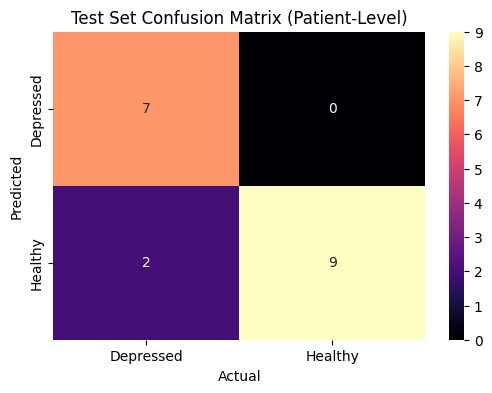

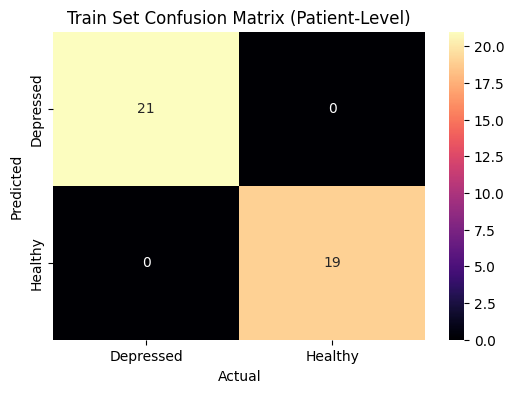

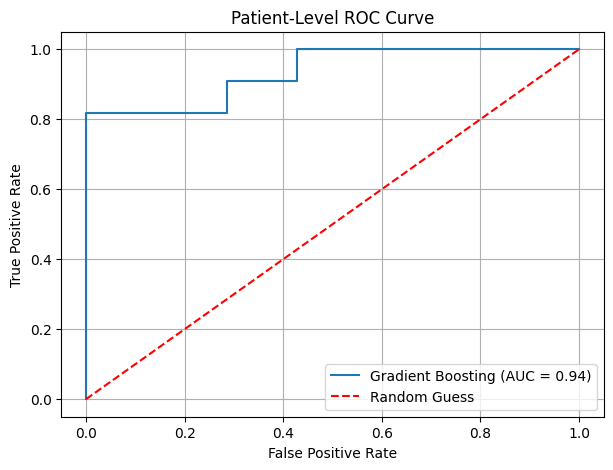

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warni

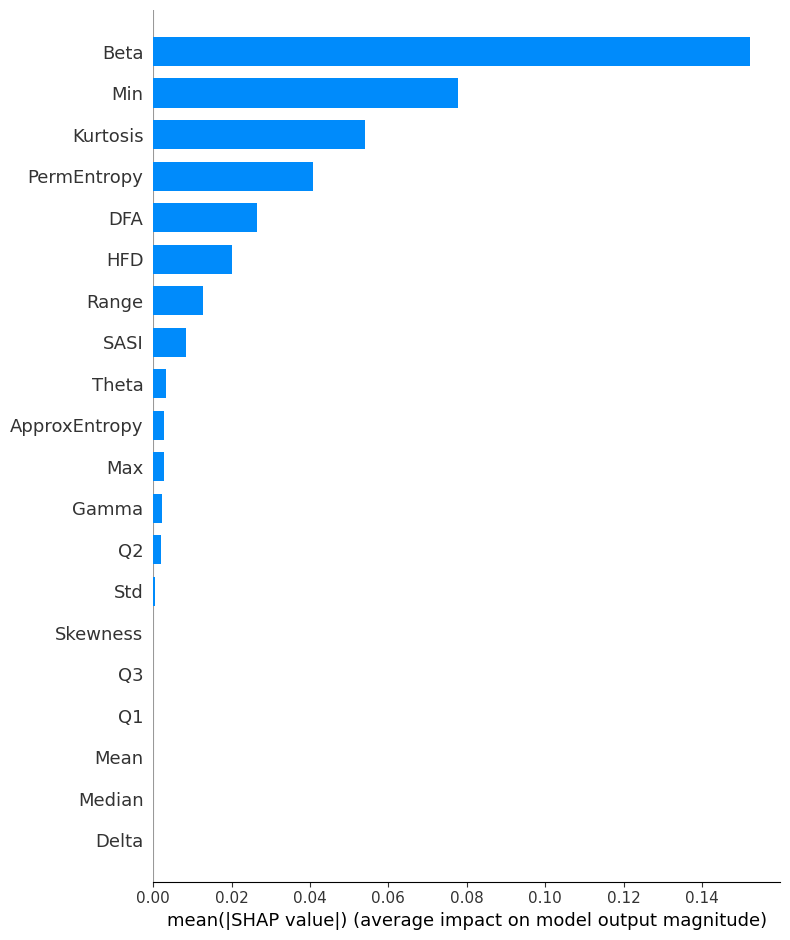

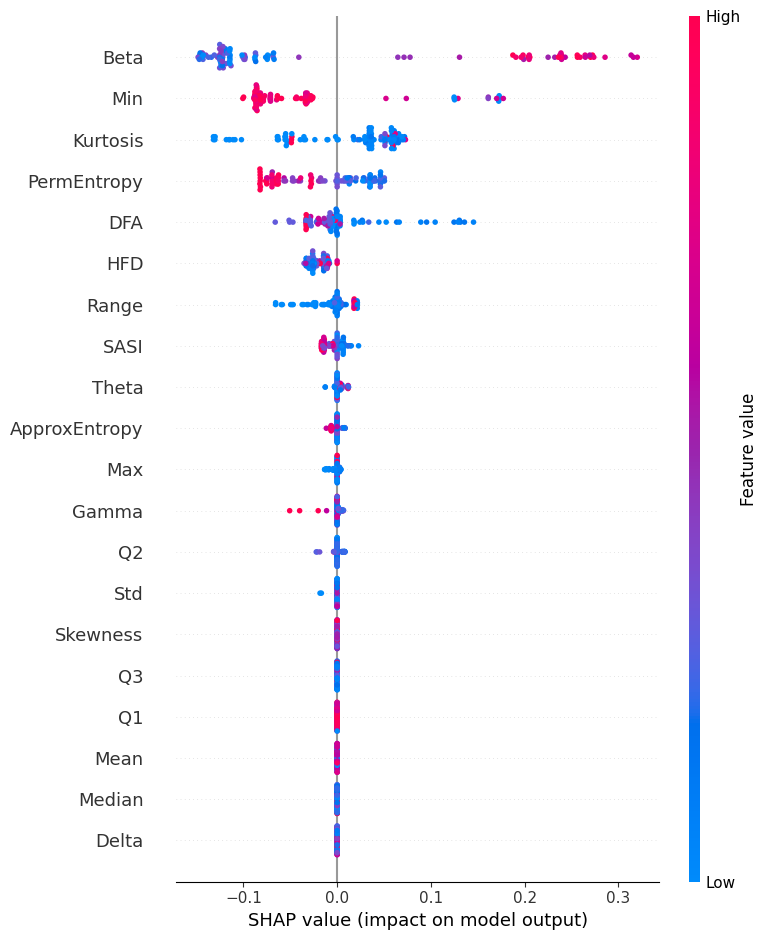

In [3]:
# 🧠 BrainScore - Depression Detection using EEG & AI


# 🚨 Disclaimer:
# This is a partial open-source demo version of the BrainScore system,
# developed for hackathon demonstration purposes. Proprietary details
# like dataset paths, internal features, and real patient data have been
# removed or anonymized for confidentiality.


# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import shap
import seaborn as sns

# Step 2: Load the Dataset (Path removed for privacy)
# Replace this with your actual CSV path or use a sample DataFrame
# csv_path = "/content/drive/MyDrive/EO-EC-TASK/EC_3.csv"
# df = pd.read_csv(csv_path)

# 🔒 Instead, we'll simulate the structure of the dataset
# with placeholder feature names and labels
np.random.seed(42)
num_samples = 1000
num_features = 20

# Create mock features and patient data
X_mock = pd.DataFrame(np.random.randn(num_samples, num_features),
                      columns=[f"Feature_{i+1}" for i in range(num_features)])
X_mock["File"] = np.random.choice([f"Patient_{i}" for i in range(50)], size=num_samples)
X_mock["Patient_Type"] = np.random.choice([0, 1], size=num_samples)

df = X_mock

# Step 3: Patient-wise train-test split
unique_patients = df["File"].unique()
train_patients, test_patients = train_test_split(unique_patients, test_size=0.3, random_state=42)

train_df = df[df["File"].isin(train_patients)]
test_df = df[df["File"].isin(test_patients)]

X_train = train_df.drop(columns=["Patient_Type", "File"])
y_train = train_df["Patient_Type"]

X_test = test_df.drop(columns=["Patient_Type", "File"])
y_test = test_df["Patient_Type"]

# Step 4: Train the Model
gb_model = GradientBoostingClassifier(n_estimators=13, learning_rate=0.1, max_depth=3, random_state=6)
gb_model.fit(X_train, y_train)

# Step 5: Predict
y_pred = gb_model.predict(X_test)
y_proba = gb_model.predict_proba(X_test)[:, 1]

test_df = test_df.copy()
test_df["pred_label"] = y_pred
test_df["pred_proba"] = y_proba

# Step 6: Patient-Level Aggregation
patient_preds = test_df.groupby("File").agg({
    "pred_proba": "mean",
    "Patient_Type": "first"
}).reset_index()
patient_preds["final_pred_label"] = (patient_preds["pred_proba"] >= 0.5).astype(int)

# Step 7: Evaluation
accuracy = accuracy_score(patient_preds["Patient_Type"], patient_preds["final_pred_label"])
conf_matrix = confusion_matrix(patient_preds["Patient_Type"], patient_preds["final_pred_label"])
class_report = classification_report(patient_preds["Patient_Type"], patient_preds["final_pred_label"])

print(f"✅ Gradient Boosting Patient-Level Accuracy: {accuracy * 100:.2f}%")
print("🧾 Patient-Level Confusion Matrix:\n", conf_matrix)
print("📄 Patient-Level Classification Report:\n", class_report)

# Step 8: Confusion Matrix Plot
def plot_patient_level_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
                xticklabels=["Depressed", "Healthy"],
                yticklabels=["Depressed", "Healthy"])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()

plot_patient_level_confusion_matrix(patient_preds["Patient_Type"], patient_preds["final_pred_label"],
                                    title="Test Set Confusion Matrix (Patient-Level)")

# Step 9: Train Set Confusion Matrix
train_df = train_df.copy()
train_df["pred_proba"] = gb_model.predict_proba(X_train)[:, 1]
train_df["pred_label"] = gb_model.predict(X_train)

train_patient_preds = train_df.groupby("File").agg({
    "pred_proba": "mean",
    "Patient_Type": "first"
}).reset_index()
train_patient_preds["final_pred_label"] = (train_patient_preds["pred_proba"] >= 0.5).astype(int)

plot_patient_level_confusion_matrix(train_patient_preds["Patient_Type"], train_patient_preds["final_pred_label"],
                                    title="Train Set Confusion Matrix (Patient-Level)")

# Step 10: ROC Curve
fpr, tpr, _ = roc_curve(patient_preds["Patient_Type"], patient_preds["pred_proba"])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Patient-Level ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Step 11: SHAP Explainability
X_train_df = X_train.reset_index(drop=True)
X_test_df = X_test.reset_index(drop=True)

def model_predict_gb(X):
    return gb_model.predict_proba(X)[:, 1]

sample_X_train = X_train_df.sample(n=100, random_state=42)
sample_X_test = X_test_df.sample(n=100, random_state=42)

explainer = shap.KernelExplainer(model_predict_gb, sample_X_train)
shap_values = explainer.shap_values(sample_X_test)

shap.summary_plot(shap_values, sample_X_test, plot_type="bar")
shap.summary_plot(shap_values, sample_X_test)
